In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
from dateutil import parser
import re
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding
import os
from sklearn import metrics

/Users/Amey/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/Amey/anaconda3/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Amey/anaconda3/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Amey/anaconda3/lib/python3.6/site-packages/tensorboard/

In [2]:
df = pd.read_csv('tweets_stocks_combined_final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2476 non-null   float64
 1   text                    2426 non-null   object 
 2   favorites               2476 non-null   int64  
 3   retweets                2476 non-null   int64  
 4   date                    2476 non-null   object 
 5   tweet_datetime          2476 non-null   object 
 6   date_part               2476 non-null   object 
 7   time_part               2476 non-null   object 
 8   hour                    2476 non-null   int64  
 9   year                    2476 non-null   int64  
 10  month                   2476 non-null   int64  
 11  datetime_30mins_after   2476 non-null   object 
 12  price_30mins_after      2476 non-null   float64
 13  datetime_now            2476 non-null   object 
 14  price_now               2476 non-null   

In [3]:
model_a_df = df.dropna(subset=['text'])

In [5]:
model_a_df

,id,text,favorites,retweets,date,tweet_datetime,date_part,time_part,hour,year,month,datetime_30mins_after,price_30mins_after,datetime_now,price_now,30mins_price_diff_abs,30mins_price_diff_perc
0,9.353400e+17,thank you rand,42793,9125,2017-11-28 02:50:00,2017-11-28 10:50:00,2017-11-28,10:50:00,10,2017,11,2017-11-28 11:20:00,261.090000,2017-11-28 10:50:00,261.100000,-0.010000,-0.000038
1,8.997980e+17,join me live from fort myer in arlington virginia,36009,4891,2017-08-22 01:00:00,2017-08-22 09:00:00,2017-08-22,09:00:00,9,2017,8,2017-08-22 09:30:00,243.580000,2017-08-22 09:00:00,243.670000,-0.090000,-0.000369
2,8.939700e+17,thank you nicole,43367,8275,2017-05-08 23:01:00,2017-05-09 07:01:00,2017-05-09,07:01:00,7,2017,5,2017-05-09 07:31:00,239.960000,2017-05-09 07:01:00,239.875000,0.085000,0.000354
3,8.819770e+17,thank you to shawn steel for the nice words on,50956,7465,2017-03-07 20:44:00,2017-03-08 04:44:00,2017-03-08,04:44:00,4,2017,3,2017-03-08 05:14:00,237.010000,2017-03-08 04:44:00,236.880000,0.130000,0.000549
4,8.778460e+17,great night in iowa special people thank you,56446,8039,2017-06-22 11:11:00,2017-06-22 19:11:00,2017-06-22,19:11:00,19,2017,6,2017-06-22 19:41:00,242.906667,2017-06-22 19:11:00,242.880000,0.026667,0.000110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,9.990960e+17,if the person placed very early into my campai...,78529,20098,2018-05-23 01:13:00,2018-05-23 09:13:00,2018-05-23,09:13:00,9,2018,5,2018-05-23 09:43:00,271.520000,2018-05-23 09:13:00,271.040000,0.480000,0.001771
2472,9.874600e+17,so general michael flynns life can be totally ...,93569,25259,2018-04-20 10:34:00,2018-04-20 18:34:00,2018-04-20,18:34:00,18,2018,4,2018-04-20 19:04:00,266.950000,2018-04-20 18:34:00,266.820000,0.130000,0.000487
2473,9.870960e+17,my thoughts prayers and condolences are with t...,62645,16081,2018-04-19 22:30:00,2018-04-20 06:30:00,2018-04-20,06:30:00,6,2018,4,2018-04-20 07:00:00,269.240000,2018-04-20 06:30:00,268.620000,0.620000,0.002308
2474,9.863570e+17,todays court decision means that congress must...,56749,12426,2018-04-17 21:34:00,2018-04-18 05:34:00,2018-04-18,05:34:00,5,2018,4,2018-04-18 06:04:00,270.552000,2018-04-18 05:34:00,270.600000,-0.048000,-0.000177


In [7]:
model_a_df['30mins_price_diff_positive'] = model_a_df['30mins_price_diff_perc'].apply(lambda x: 1 if x >= 0 else 0)

/Users/Amey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
model_a_df

,id,text,favorites,retweets,date,tweet_datetime,date_part,time_part,hour,year,month,datetime_30mins_after,price_30mins_after,datetime_now,price_now,30mins_price_diff_abs,30mins_price_diff_perc,30mins_price_diff_positive
0,9.353400e+17,thank you rand,42793,9125,2017-11-28 02:50:00,2017-11-28 10:50:00,2017-11-28,10:50:00,10,2017,11,2017-11-28 11:20:00,261.090000,2017-11-28 10:50:00,261.100000,-0.010000,-0.000038,0
1,8.997980e+17,join me live from fort myer in arlington virginia,36009,4891,2017-08-22 01:00:00,2017-08-22 09:00:00,2017-08-22,09:00:00,9,2017,8,2017-08-22 09:30:00,243.580000,2017-08-22 09:00:00,243.670000,-0.090000,-0.000369,0
2,8.939700e+17,thank you nicole,43367,8275,2017-05-08 23:01:00,2017-05-09 07:01:00,2017-05-09,07:01:00,7,2017,5,2017-05-09 07:31:00,239.960000,2017-05-09 07:01:00,239.875000,0.085000,0.000354,1
3,8.819770e+17,thank you to shawn steel for the nice words on,50956,7465,2017-03-07 20:44:00,2017-03-08 04:44:00,2017-03-08,04:44:00,4,2017,3,2017-03-08 05:14:00,237.010000,2017-03-08 04:44:00,236.880000,0.130000,0.000549,1
4,8.778460e+17,great night in iowa special people thank you,56446,8039,2017-06-22 11:11:00,2017-06-22 19:11:00,2017-06-22,19:11:00,19,2017,6,2017-06-22 19:41:00,242.906667,2017-06-22 19:11:00,242.880000,0.026667,0.000110,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,9.990960e+17,if the person placed very early into my campai...,78529,20098,2018-05-23 01:13:00,2018-05-23 09:13:00,2018-05-23,09:13:00,9,2018,5,2018-05-23 09:43:00,271.520000,2018-05-23 09:13:00,271.040000,0.480000,0.001771,1
2472,9.874600e+17,so general michael flynns life can be totally ...,93569,25259,2018-04-20 10:34:00,2018-04-20 18:34:00,2018-04-20,18:34:00,18,2018,4,2018-04-20 19:04:00,266.950000,2018-04-20 18:34:00,266.820000,0.130000,0.000487,1
2473,9.870960e+17,my thoughts prayers and condolences are with t...,62645,16081,2018-04-19 22:30:00,2018-04-20 06:30:00,2018-04-20,06:30:00,6,2018,4,2018-04-20 07:00:00,269.240000,2018-04-20 06:30:00,268.620000,0.620000,0.002308,1
2474,9.863570e+17,todays court decision means that congress must...,56749,12426,2018-04-17 21:34:00,2018-04-18 05:34:00,2018-04-18,05:34:00,5,2018,4,2018-04-18 06:04:00,270.552000,2018-04-18 05:34:00,270.600000,-0.048000,-0.000177,0


# Model A (only word vectors)

In [10]:
x = model_a_df['text']
y = model_a_df['30mins_price_diff_positive']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [39]:
model_a_corpus_list = []

for i in model_a_X_train:
    model_a_corpus_list.append(i.split())

In [40]:
model_a_word2vec_model = Word2Vec(model_a_corpus_list, min_count=1, size=100)
model_a_pretrained_weights = model_a_word2vec_model.wv.vectors

In [41]:
model_a_num_words = [len(i) for i in model_a_corpus_list]
model_a_longest_sentence_len = max(model_a_num_words)

In [12]:
embeddings_index = {}
f = open('glove/glove.twitter.27B.50d.txt', encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.


In [16]:
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1

#text to integers
sequences = tokenizer.texts_to_sequences(x_train)
longest_sentence_len = 30
x_train_padded = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=longest_sentence_len, padding='post')

print('Found %s unique tokens.' % len(word_index))

Found 5039 unique tokens.


In [18]:
unique_words = set(word_index.keys())
def prepare_test_x_glove(x):
    
    global unique_words
    global word_index
    global longest_sentence_len
    result = []
    
    for tweet in x:
        indices = []
        for word in tweet.split():
            if word in unique_words:
                indices.append(word_index[word])
            else:
                indices.append(0)
            
        result.append(indices)
    return keras.preprocessing.sequence.pad_sequences(result, maxlen=longest_sentence_len, padding='post')

x_test_padded = prepare_test_x_glove(x_test)

In [20]:
print(np.mean([len(sequence) for sequence in sequences]))
x_test_padded

27.438769230769232


array([[ 318,   23,  304, ...,    0,    0,    0],
       [ 103,  814,    2, ...,    0,    0,    0],
       [   1,  210,    0, ...,    2, 1483,  438],
       ...,
       [1221,   54,  400, ...,    0,    0,    0],
       [   0,   12,   16, ...,   44,   42,    5],
       [  37,    9,    2, ...,    0,    0,    0]], dtype=int32)

In [21]:
embedding_matrix = np.zeros((vocab_size, 50))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        
embedding_layer_glove = Embedding(vocab_size,
                            50,
                            weights=[embedding_matrix],
                            input_length=longest_sentence_len,
                            trainable=False)

In [33]:
def model():
    
    global embedding_layer_glove
    vocab_size, embedding_size = pretrained_weights.shape
    model = keras.Sequential()
    # model.add(layers.Input(shape=longest_sentence_len, dtype='int32'))
    model.add(embedding_layer_glove)
    # model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_size, weights=[pretrained_weights], trainable=False))  
    model.add(layers.LSTM(4, return_sequences=True, name='LSTM1'))
    model.add(layers.Dropout(0.25,name='Dropout1'))
    model.add(layers.LSTM(4, return_sequences=False, name='LSTM2'))
    model.add(layers.Dropout(0.25,name='Dropout2'))
    model.add(layers.Dense(4,name='Dense',activation='tanh'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(2,activation='Softmax'))
    
    return model

# Model A (classification)

In [64]:
def create_model_classification():
    global embedding_layer_glove
#     vocab_size, embedding_size = pretrained_weights.shape
    model = keras.Sequential()
    # model.add(layers.Input(shape=longest_sentence_len, dtype='int32'))
    model.add(embedding_layer_glove)
    # model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_size, weights=[pretrained_weights], trainable=False))  
    model.add(layers.LSTM(4, return_sequences=True, name='LSTM1'))
    model.add(layers.Dropout(0.25,name='Dropout1'))
    model.add(layers.LSTM(4, return_sequences=False, name='LSTM2'))
    model.add(layers.Dropout(0.25,name='Dropout2'))
#     model.add(layers.Dense(4,name='Dense',activation='sigmoid'))
#     model.add(layers.Dropout(0.1))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [65]:
classification_model = create_model_classification()
opt = keras.optimizers.Adam(learning_rate=0.001)
classification_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
classification_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 50)            252000    
_________________________________________________________________
LSTM1 (LSTM)                 (None, 30, 4)             880       
_________________________________________________________________
Dropout1 (Dropout)           (None, 30, 4)             0         
_________________________________________________________________
LSTM2 (LSTM)                 (None, 4)                 144       
_________________________________________________________________
Dropout2 (Dropout)           (None, 4)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 253,029
Trainable params: 1,029
Non-trainable params: 252,000
___________________________________________

In [66]:
from datetime import datetime
from keras.utils import to_categorical

now = datetime.now()
dt_string = now.strftime("%d%m%Y %H%Mh")

# checkpoint_filepath = f'./model_a_checkpoint/classification {dt_string}.h5'
# model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_loss',
#     mode='min',
#     verbose = 1,
#     save_best_only=True) 

classification_model.fit(x_train_padded, y_train, validation_split=0.2, epochs=20,verbose=1)
test_loss, test_acc = classification_model.evaluate(x_test_padded, y_test,verbose=1)
print(test_loss)
print(test_acc)

# classification_history = classification_model.fit(x_train_padded, y_train, validation_split=0.2, epochs=50)

Train on 1300 samples, validate on 325 samples
Epoch 1/20
1300/1300 [==============================] - 7s 6ms/sample - loss: 0.6930 - accuracy: 0.5185 - val_loss: 0.6923 - val_accuracy: 0.5262
Epoch 2/20
1300/1300 [==============================] - 2s 1ms/sample - loss: 0.6900 - accuracy: 0.5554 - val_loss: 0.6920 - val_accuracy: 0.5323
Epoch 3/20
1300/1300 [==============================] - 2s 1ms/sample - loss: 0.6887 - accuracy: 0.5631 - val_loss: 0.6921 - val_accuracy: 0.5323
Epoch 4/20
1300/1300 [==============================] - 2s 1ms/sample - loss: 0.6877 - accuracy: 0.5569 - val_loss: 0.6931 - val_accuracy: 0.5292
Epoch 5/20
1300/1300 [==============================] - 2s 1ms/sample - loss: 0.6867 - accuracy: 0.5615 - val_loss: 0.6950 - val_accuracy: 0.5231
Epoch 6/20
1300/1300 [==============================] - 1s 1ms/sample - loss: 0.6859 - accuracy: 0.5708 - val_loss: 0.6968 - val_accuracy: 0.5231
Epoch 7/20
1300/1300 [==============================] - 1s 1ms/sample - loss:

In [67]:
classification_pred = classification_model.predict(x_test_padded)

In [46]:
# classification_loaded = create_model_classification()
# classification_loaded.load_weights(checkpoint_filepath)
# classification_loaded.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# classification_pred = classification_loaded.predict(x_test_padded)


In [69]:
[np.argmax(i) for i in classification_pred]

[array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]

<AxesSubplot:>

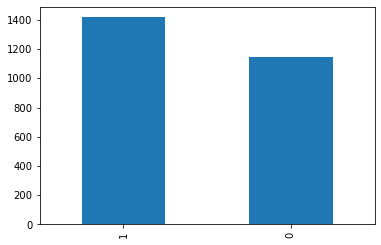

In [201]:
pd.value_counts(classification_y).plot(kind="bar")

# Model B (word vectors + price history)

In [ ]:
model_b_df = df.dropna(subset=['cleaned_text', 'prev_60mins_prices'])

model_b_X = model_b_df.loc[:, ['cleaned_text_2', 'prev_60mins_prices']]
model_b_y = model_b_df.loc[:, '60mins_price_diff_perc']

model_b_X_train, model_b_X_test, model_b_y_train, model_b_y_test = train_test_split(model_b_X, model_b_y, test_size=0.33, random_state=42)

model_b_X_train_text = model_b_X_train.iloc[:, 0]
model_b_X_train_price_history = model_b_X_train.iloc[:, 1].apply(lambda x: split(strip()))
model_b_X_test_text = model_b_X_test.iloc[:, 0]
model_b_X_test_price_history = model_b_X_test.iloc[:, 1]
                           
model_b_corpus_list = []

for i in model_b_X_train_text:
    model_b_corpus_list.append(i.split())
    
model_b_word2vec_model = Word2Vec(model_b_corpus_list, min_count=1, size=100)
model_b_pretrained_weights = model_b_word2vec_model.wv.vectors

model_b_num_words = [len(i) for i in model_b_corpus_list]
model_b_longest_sentence_len = max(model_b_num_words)

model_b_X_train_padded = sentence_to_indices_padded(model_b_X_train_text, model_b_longest_sentence_len)
model_b_X_test_padded = sentence_to_indices_padded(model_b_X_test_text, model_b_longest_sentence_len)

model_b_X_train_input = [model_b_X_train_padded, np.array(model_b_X_train_price_history)]
model_b_X_test_input = [model_b_X_test_padded, model_b_X_test_price_history]

In [ ]:
type(np.array(model_b_X_train_input[1]))

In [ ]:
def create_model_b(pretrained_weights, longest_sentence_len, price_history_shape):
    vocab_size, embedding_size = pretrained_weights.shape
    
    # word vectors model
    model1_input = layers.Input(shape=longest_sentence_len, dtype='int32', name='sentence_index_input')
    model1 = layers.Embedding(input_dim=vocab_size, output_dim=embedding_size, weights=[pretrained_weights], trainable=False)(model1_input)  
    model1 = layers.LSTM(4, return_sequences=True, name='model1_LSTM1')(model1)
    model1 = layers.Dropout(0.25,name='model1_dropout1')(model1)
    model1 = layers.LSTM(4, return_sequences=False, name='model1_LSTM2')(model1)
    model1 = layers.Dropout(0.25,name='model1_dropout2')(model1)
    
    # price history model
    model2_input = layers.Input(shape=price_history_shape, dtype='float32', name='price_history_input')
    model2 = layers.LSTM(4, return_sequences=True, name='model2_LSTM1')(model2_input)
    model2 = layers.Dropout(0.25,name='model2_dropout1')(model2)
    model2 = layers.LSTM(4, return_sequences=False, name='model2_LSTM2')(model2)
    model2 = layers.Dropout(0.25,name='model2_dropout2')(model2)
    
    model_concat = layers.concatenate([model1, model2])
    model_concat = layers.Dense(4,name='Dense',activation='relu')(model_concat)
    model_concat = layers.Dropout(0.1)(model_concat)
    model_concat = layers.Dense(1,activation='linear')(model_concat)
    
    model = keras.models.Model(inputs=[model1_input, model2_input], outputs = model_concat)
    
    return model

In [ ]:
model_b = create_model_b(model_b_pretrained_weights, model_b_longest_sentence_len, (30,1,))

In [ ]:
model_b.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
model_b.summary()

In [ ]:
from datetime import datetime

now = datetime.now()
dt_string = now.strftime("%d%m%Y %H%Mh")

checkpoint_filepath = f'./model_b_checkpoint/{dt_string}.h5'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    verbose = 1,
    save_best_only=True) 

model_b.fit(model_b_X_train_input, model_b_y_train, validation_split=0.2, epochs=50, callbacks=[model_checkpoint_callback])

In [ ]:
model_b_X_train_input[1][0]